In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.13.0'

In [2]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, LeakyReLU
from keras.callbacks import EarlyStopping #to stop the model training 

In [3]:
#first few layers used for features and others are for decision making

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
house_data = fetch_california_housing()

In [7]:
df = house_data.data
df = pd.DataFrame(df, columns=house_data.feature_names)

In [8]:
df['Price'] = house_data.target

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
import sweetviz

In [11]:
report = sweetviz.analyze(df, target_feat='Price')

                                             |                                             | [  0%]   00:00 ->…

In [12]:
report.show_html('california_housing.html')

Report california_housing.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
X = df.drop(['Price'], axis= 1)
y = df['Price']

In [14]:
X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size= 0.2, 
                                                   random_state=666)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(16512, 8)

In [17]:
model = Sequential()

#input layer
model.add(Dense(input_dim= 8, units= 16, activation= ReLU()))

#hidden layers
model.add(Dense(units = 8, activation=LeakyReLU(0.1)))
model.add(Dense(units = 8, activation='relu'))

#output layers
model.add(Dense(units= 1, activation='relu'))

model.compile(loss= 'mse', optimizer= 'sgd', metrics= ['mae','mse'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
es = EarlyStopping(monitor= 'val_mae', patience= 5)

In [20]:
history = model.fit(X_train, y_train, 
                    validation_split=0.15, #test_sixe
                    epochs= 1000, #iteration
                    callbacks=[es],  #stopping 
                    use_multiprocessing= True, 
                    workers= -1
                   )

Epoch 1/1000
439/439 [==============================] - 1s 1ms/step - loss: 0.9292 - mae: 0.6595 - mse: 0.9292 - val_loss: 0.5399 - val_mae: 0.5302 - val_mse: 0.5399
Epoch 2/1000
439/439 [==============================] - 0s 991us/step - loss: 0.4668 - mae: 0.4912 - mse: 0.4668 - val_loss: 0.4850 - val_mae: 0.5042 - val_mse: 0.4850
Epoch 3/1000
439/439 [==============================] - 0s 1ms/step - loss: 0.4690 - mae: 0.4866 - mse: 0.4690 - val_loss: 0.5116 - val_mae: 0.5140 - val_mse: 0.5116
Epoch 4/1000
439/439 [==============================] - 0s 1ms/step - loss: 0.4340 - mae: 0.4694 - mse: 0.4340 - val_loss: 0.4566 - val_mae: 0.4770 - val_mse: 0.4566
Epoch 5/1000
439/439 [==============================] - 0s 1ms/step - loss: 0.4006 - mae: 0.4511 - mse: 0.4006 - val_loss: 0.4447 - val_mae: 0.4638 - val_mse: 0.4447
Epoch 6/1000
439/439 [==============================] - 0s 1ms/step - loss: 0.3915 - mae: 0.4447 - mse: 0.3915 - val_loss: 0.4337 - val_mae: 0.4630 - val_mse: 0.4337
Ep

In [21]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

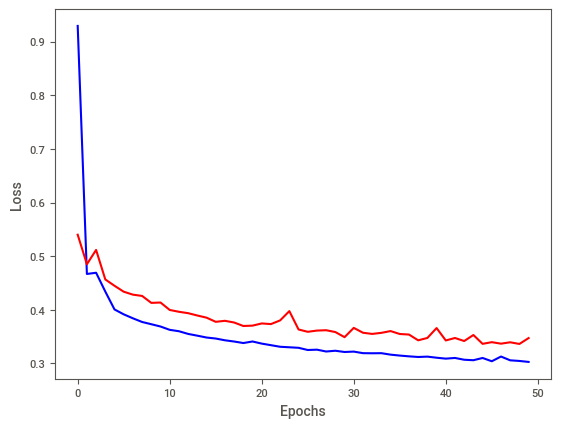

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['loss'], c= 'b')
plt.plot(history.history['val_loss'], c= 'r')

plt.show()

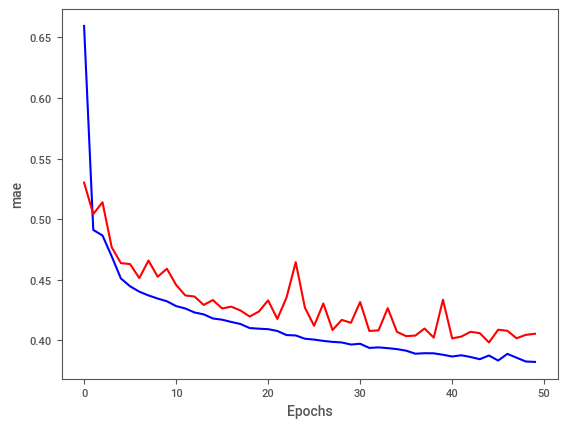

In [23]:
plt.xlabel('Epochs')
plt.ylabel('mae')

plt.plot(history.history['mae'], c= 'b')
plt.plot(history.history['val_mae'], c= 'r')

plt.show()

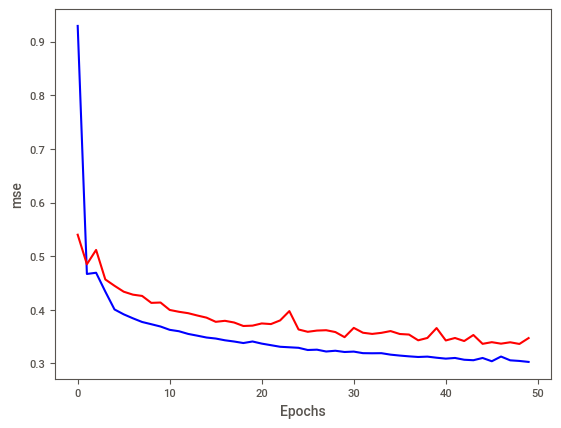

In [24]:
plt.xlabel('Epochs')
plt.ylabel('mse')

plt.plot(history.history['mse'], c= 'b')
plt.plot(history.history['val_mse'], c= 'r')

plt.show()

In [25]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 758us/step


In [26]:
r2_score(y_test, y_pred)

0.7409661583783274